<a href="https://colab.research.google.com/github/projectsforstudents2022/Clothing_Classification/blob/main/Clothing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Let's create training and testing dataframes using CSV files

training_df = pd.read_csv('/content/drive/MyDrive/Projects/Clothing_Classification/fashion-mnist_train.csv')
testing_df = pd.read_csv('/content/drive/MyDrive/Projects/Clothing_Classification/fashion-mnist_test.csv')

In [4]:
# Let's check first 5 rows of training dataframe

training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's check last 5 rows of training dataframe

training_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Let's check first 5 rows of testing dataframe

testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let's check last 5 rows of testing dataframe

testing_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
# Let's create numpy arrays for training and testing dataframes 

trainData = np.array(training_df, dtype='float32')
testData = np.array(testing_df, dtype='float32')

In [9]:
# Let's check the training data and it's shape

print(trainData)
print('\n')
print(trainData.shape)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


(60000, 785)


In [10]:
# Let's check the testing data

print(testData)
print('\n')
print(testData.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(10000, 785)


6.0


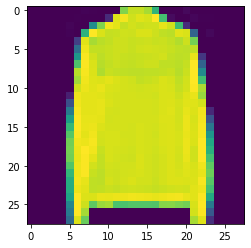

In [11]:
# Let's visualize an image randomly using any random number from training data

import random
i = random.randint(1, trainData.shape[0])
plt.imshow(trainData[i, 1:].reshape(28, 28))
print(trainData[i, 0])

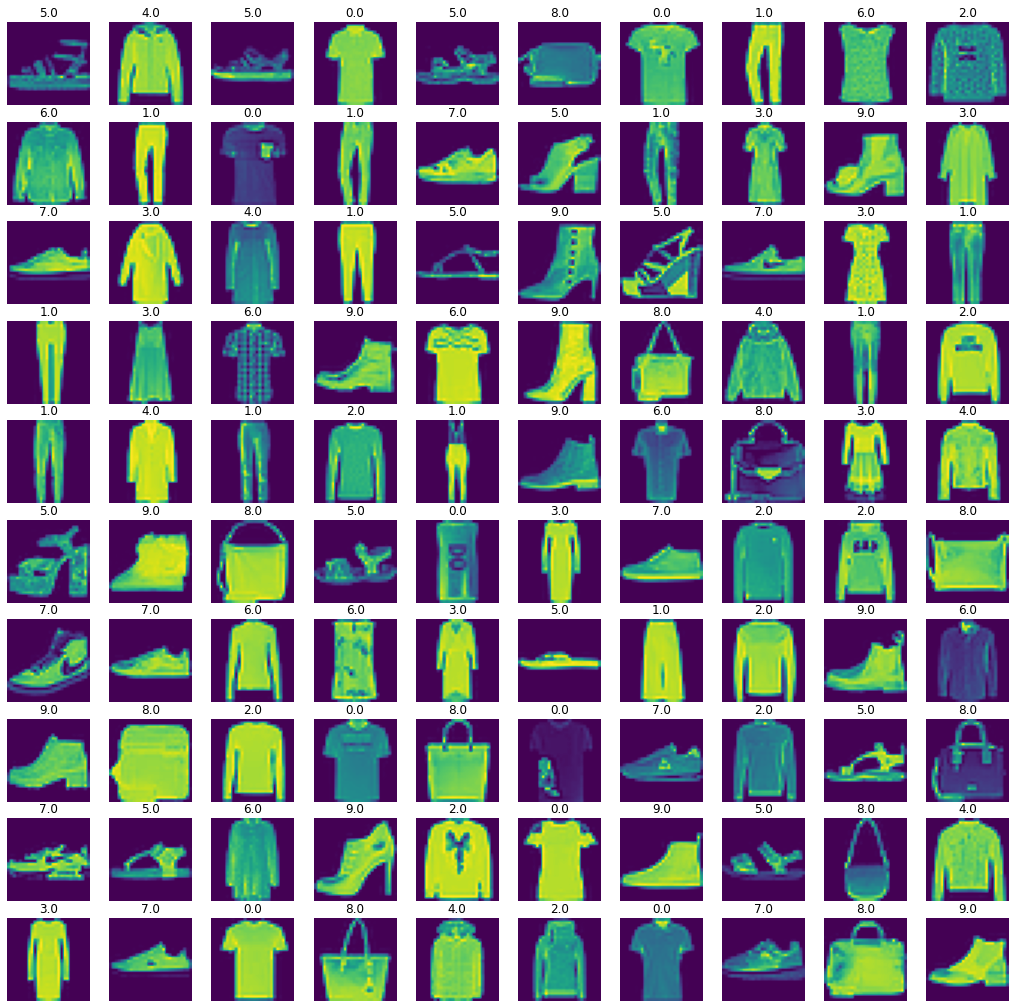

In [12]:
# Let's view multiple images in a grid format

Grid_W = 10 
Grid_H = 10 
fig, axes = plt.subplots(nrows=Grid_H, ncols=Grid_W, figsize = (18,18))
axes = axes.ravel()

for i in np.arange(0, Grid_W*Grid_H):
    index = np.random.randint(0, len(trainData))
    axes[i].imshow(trainData[index, 1:].reshape(28, 28))
    axes[i].set_title(trainData[index, 0])
    axes[i].axis('off')   

In [13]:
# Let's split the data into initial X_train and y_train data

X_train_init = trainData[:, 1:] / 255 
y_train_init = trainData[:, 0]
X_test = testData[:, 1:] / 255 
y_test = testData[:, 0]

In [14]:
# Let's split the training data further to create training and validation data

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_init, y_train_init, 
                                                      test_size=0.2, random_state = 0)

In [15]:
X_train.shape

(48000, 784)

In [16]:
X_valid.shape

(12000, 784)

In [17]:
# Let's reshape the array similar to an image data e.g. (row, column, channel)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [18]:
# Let's check the new shape of the training, testing and validation data

X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_valid.shape

(12000, 28, 28, 1)

In [24]:
# Importing necessary libraries using keras to build a NN

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
# Let's create a NN model

cnnModel = Sequential()
cnnModel.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size=(2,2)))
cnnModel.add(Dropout(0.2))
cnnModel.add(Flatten())
cnnModel.add(Dense(units=64, activation = 'relu'))
cnnModel.add(Dense(units=32, activation = 'relu'))
cnnModel.add(Dense(units=10, activation = 'sigmoid'))


In [27]:
# Let's compile the model

cnnModel.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Let's fit the model to validation data

cnnModel.fit(x=X_train, 
             y=y_train, 
             batch_size=512, 
             epochs=10, 
             verbose=1, 
             validation_data=(X_valid, y_valid)
            )

Epoch 1/10
94/94 [==============================] - 39s 411ms/step - loss: 0.5349 - accuracy: 0.8082 - val_loss: 0.4539 - val_accuracy: 0.8389
Epoch 2/10
94/94 [==============================] - 35s 375ms/step - loss: 0.4080 - accuracy: 0.8573 - val_loss: 0.3748 - val_accuracy: 0.8742
Epoch 3/10
94/94 [==============================] - 36s 381ms/step - loss: 0.3582 - accuracy: 0.8752 - val_loss: 0.3385 - val_accuracy: 0.8819
Epoch 4/10
94/94 [==============================] - 35s 375ms/step - loss: 0.3278 - accuracy: 0.8843 - val_loss: 0.3239 - val_accuracy: 0.8843
Epoch 5/10
94/94 [==============================] - 35s 375ms/step - loss: 0.3041 - accuracy: 0.8917 - val_loss: 0.3031 - val_accuracy: 0.8931
Epoch 6/10
94/94 [==============================] - 35s 373ms/step - loss: 0.2844 - accuracy: 0.8987 - val_loss: 0.2917 - val_accuracy: 0.8971
Epoch 7/10
94/94 [==============================] - 35s 372ms/step - loss: 0.2719 - accuracy: 0.9031 - val_loss: 0.2887 - val_accuracy: 0.8973

In [30]:
# Checking the accuracy of model on test data

accuracy = cnnModel.evaluate(X_test, y_test)
print('Test Acuuracy : {}'.format(accuracy[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.2486 - accuracy: 0.9130
Test Acuuracy : 0.9129999876022339
